## 영화 리뷰 분류 - 이진분류
- 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 예제

## IMDB 데이터셋

- 인터넷 영화 데이터베이스(Internet Movie Database)로부터 가져온 
- 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용


- 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 
- 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있음


- 케라스에 포함되어 있고
- 전처리되어 있음 : 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있음
- 각 숫자는 사전에 있는 고유한 단어를 나타냄


어휘 사전 (사전)
- 모든 단어에 고유한 번호 부여
- 텍스트 데이터를 다룰 때 기본적으로 수행하는 전처리 과정


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 데이터셋 로드
# 처음 실행하면 17MB 정도의 데이터가 컴퓨터에 다운로드

from tensorflow.keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) ## 자주 사용하는 만개만 사용하겠다는 의미

# um_words=10000
# - 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미로
# - 드물게 나타나는 단어는 무시
# - 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있습


train_data / test_data : 리뷰 목록
- 각 리뷰는 단어 인덱스의 리스트
- 단어 시퀀스가 인코딩된 것

train_labels / test_labels (레이블 값)
- 0 : 부정
- 1: 긍정


In [3]:
train_data.shape
test_data.shape

(25000,)

(25000,)

In [4]:
# index 값으로 매핑되어 있는 것
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]
# 1이므로 긍정

1

In [6]:
max([max(sequence) for sequence in train_data]) ## 만개의 단어가 index 9999 안에 들어와 있음

9999

In [7]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [8]:
word_index = imdb.get_word_index()

In [9]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]]) ## 0,1,2 특수한 번호 (0간격,1문서시작,2없는단어)

In [14]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [14]:
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[2]]) ## 0,1,2 특수한 번호 (0간격,1문서시작,2없는단어)

In [15]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

### 데이터 준비
- 숫자 리스트를 신경망에 입력으로 사용할 수 없기 때문에
- 리스트를 텐서로 변경
- 원-핫 인코딩 방법을 사용해서 변환

In [16]:
# 원-핫 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬 생성
    # (25000, 10000) #가장 자주 등장하는 단어 10,000개로 제한
    results = np.zeros((len(sequences), dimension)) # 모두 0으로 채움
    # [1, 14, 22, 16, 43, 530, 973,  
#     => 10000개의 컬럼(0~9999)중 1번 컬럼 14번 22번 16번 43번 530번 973번 컬럼 값을 1.으로 변경
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results


In [17]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)


In [18]:
x_train[0]
len(x_train[0])
x_train[0].sum()
x_train[5].sum()

array([0., 1., 1., ..., 0., 0., 0.])

10000

120.0

35.0

#### 레이블을 float32 형으로 변환

In [19]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [20]:
y_train
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

#### 모델에 주입할 데이터 완성

신경망 모델 만드는 작업 순서    
(1) 모델 설정  
(2) 모델 컴파일  
(3) 모델 학습(실행)  
(4) 결과 출력


#### 입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0) : 간단
- 이진분류에 성능이 좋다고 알려져 있는 모델은 활성화 함수로 relu를 사용한 연결 층
- 즉, Dense(16, activation='relu') 이 층을 그냥 쌓은 모델이 가장 성능이 좋다

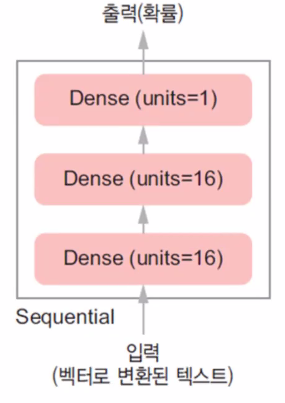

In [21]:
# (1) 모델 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [22]:
tf.random.set_seed(3)

In [23]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

(2) 모델 컴파일  

**손실 함수와 옵티마이저 선택**

**손실 함수**  
- 이진 분류 문제이고 신경망의 출력이 확률이기 때문에
- (네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 두었음), 
- `binary_crossentropy` 손실이 적합
- 이 함수가 유일한 선택은 아니고 예를 들어 `mean_squared_error`를 사용할 수도 있음
- 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택
    - 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정
    - 여기에서는 원본 분포와 예측 분포 사이를 측정

**옵티마이저**
- optimizer='rmsprop'
- 옵티마이저 매개변수 변경 시 : optimizer=optimizers.RMSprop(lr=0.001) 형태로 사용
- 개발자가 직접  손실 함수를 만들 수 있음 
    - 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 
    - optimizer 매개변수에 전달하면 됨


In [24]:
# (2) 모델 컴파일  
# `rmsprop` 옵티마이저와 
# `binary_crossentropy` 손실 함수로 
# 모델을 설정하는 단계

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

RMSprop(keras.optimizers.RMSprop(lr=0.001)
- lr : learning_rate


## 훈련 검증

검증 데이터 셋 생성
- 훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서 
- 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트 생성
- 학습 검증 : fit(validation_data= )


In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [26]:
# (3) 모델 학습(실행) 
# 맷플롯립을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 시각화하기 위해
# model.fit() 메서드가 반환하는 History 객체 생성
# 훈련하는 동안 발생한 모든 정보를 담고 있는 
# 이 객체는 딕셔너리인 history 속성을 가지고 있음
    
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# 'loss', 'accuracy', 'val_loss', 'val_accuracy' 표시
# 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도


Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5036 - accuracy: 0.7921 - val_loss: 0.3853 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3022 - accuracy: 0.9043 - val_loss: 0.3229 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9263 - val_loss: 0.3136 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1766 - accuracy: 0.9443 - val_loss: 0.2813 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1467 - accuracy: 0.9521 - val_loss: 0.2816 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1183 - accuracy: 0.9645 - val_loss: 0.2946 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.3084 - val_accuracy: 0.8823
Epoch 8/20
30/30 [=

### 결과
- 에포크 마다 2초가 걸리지 않음
- 전체 훈련은 시간이 조금 더 오래 걸림 - 에포크 끝날 때 마다 10000개 검증 샘플 데이터로 손실과 정확도를 계산
- 정확도는 0.9996이 나오고 계속 상승
- 검증 데이터는 그에 미치지 못함

## 훈련과 검증 데이터에 대한 손실과 정확도 시각화
- model.fit() 함수가 반환한 결과를 이용해서 시각화
    - fit() 함수는 모델 실행시 생성된 데이터를딕셔너리 형태로 반환

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['loss']

[0.5035755634307861,
 0.3022335171699524,
 0.22488442063331604,
 0.17656075954437256,
 0.14671790599822998,
 0.11833222210407257,
 0.09818793833255768,
 0.08410487323999405,
 0.0688679963350296,
 0.05868446081876755,
 0.04781736806035042,
 0.038566868752241135,
 0.031240439042448997,
 0.025929979979991913,
 0.02283165231347084,
 0.013996494933962822,
 0.014274182729423046,
 0.010821577161550522,
 0.008748729713261127,
 0.009948032908141613]

In [30]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [31]:
epochs = range(1, len(acc)+1)

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

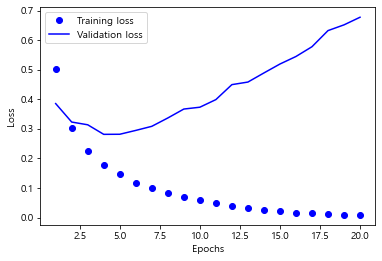

In [34]:
# 훈련 손실과 검증 손실 시각화
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

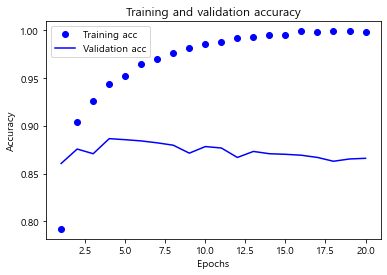

In [37]:
# 훈련 정확도와 검증 정확도 시각화

plt.clf()   # 그래프 초기화
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy'] 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#### 그래프 결론
- 에포크 4 지점에서 val_acc가 하락하고 있고, acc는 계속 상승
    - 과적합이 발생한 걸로 보임
- 이 모델을 사용해야 한다면 ephch를 4까지만 진행시켜야 함

In [40]:
#처음부터 다시 새로운 신경망을 
# 4번의 에포크 동안만 훈련하고 
# 테스트 데이터에서 평가

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4535 - accuracy: 0.8219 - val_loss: 0.2894 - val_accuracy: 0.9120
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2610 - accuracy: 0.9097 - val_loss: 0.1985 - val_accuracy: 0.9356
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.9284 - val_loss: 0.1563 - val_accuracy: 0.9506
Epoch 4/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1692 - accuracy: 0.9381 - val_loss: 0.1322 - val_accuracy: 0.9590


In [41]:
# 모델 평가
result = model.evaluate(x_test, y_test)

782/782 [==============================] - 0s 547us/step - loss: 0.2911 - accuracy: 0.8853


In [42]:
result
## 아주 단순한 방식으로 88.5%의 정확도 달성

[0.2910781800746918, 0.8852800130844116]

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

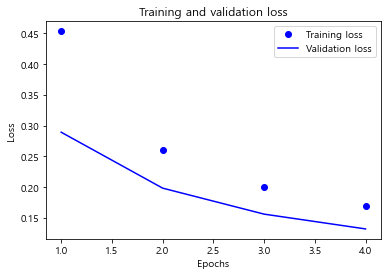

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 훈련 손실과 검증 손실 시각화
# ‘bo’는 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

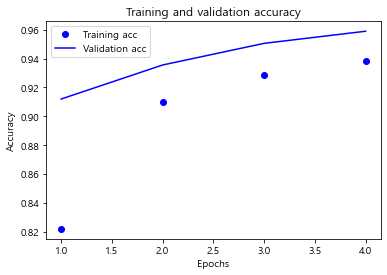

In [46]:
plt.clf()   # 그래프 초기화
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy'] 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
